In [15]:
import pandas as pd
import numpy as np
import missingno
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Reading Values
Read the csv file using pandas and store it in a dataframe

In [16]:
srcData = pd.read_csv("/Case_1_Weather_prediction/climate.csv")
srcData.head()

,Temperature,Wind_speed,Description,Weather,feels_like,name,temp_min,temp_max,pressure,humidity,visibility,sunrise,sunset,Date,Time
0,284.02,1.5,clear sky,Clear,281.11,Dublin,281.48,286.48,1016,50,16093,1582037662,1582076961,19/2/20,4:14:12
1,301.15,2.6,clear sky,Clear,307.02,France,301.15,301.15,1009,94,6000,1582093790,1582136891,19/2/20,4:14:12
2,278.39,7.2,few clouds,Clouds,271.81,Germany,277.15,279.82,1013,84,10000,1582093536,1582130311,19/2/20,4:14:12
3,284.19,6.7,overcast clouds,Clouds,278.01,Italy,283.15,285.37,1024,58,16093,1582031256,1582071339,19/2/20,4:14:13
4,284.69,4.1,broken clouds,Clouds,279.61,Tokyo,283.15,285.93,1024,40,10000,1582061102,1582100736,19/2/20,4:14:13


In [17]:
list(srcData.columns)

['Temperature',
 'Wind_speed',
 'Description',
 'Weather',
 'feels_like',
 'name',
 'temp_min',
 'temp_max',
 'pressure',
 'humidity',
 'visibility',
 'sunrise',
 'sunset',
 'Date',
 'Time']

In [18]:
description = ['Target_Value(Numerical)','Numerical','Will be excluded','Categorical','Numerical','Will be excluded',
               'Numerical','Numerical','Numerical','Numerical','Numerical','Numerical','Numerical',
              'Will be excluded','Will be excluded']

In [19]:
pd.DataFrame({'Variables name':list(srcData.columns),'DataTypes':srcData.dtypes,'Description':description})

,Variables name,DataTypes,Description
Temperature,Temperature,float64,Target_Value(Numerical)
Wind_speed,Wind_speed,float64,Numerical
Description,Description,object,Will be excluded
Weather,Weather,object,Categorical
feels_like,feels_like,float64,Numerical
name,name,object,Will be excluded
temp_min,temp_min,float64,Numerical
temp_max,temp_max,float64,Numerical
pressure,pressure,int64,Numerical
humidity,humidity,int64,Numerical


In [123]:
def get_hist_for_all_variables():
    hist_Columns = list(i for i in srcData.select_dtypes([np.number]).columns if i not in ['Temperature'])
    count=0
    fig, axs = plt.subplots(2, 4, tight_layout=True,figsize=(15,5)) 
    plt.figure(figsize=(20,10))
    for i in range(0,2):
        for j in range(0,4):
            axs[i,j].hist(srcData[hist_Columns[count]])
            axs[i,j].set(title = hist_Columns[count], xlabel= hist_Columns[count],ylabel='count')
            count+=1

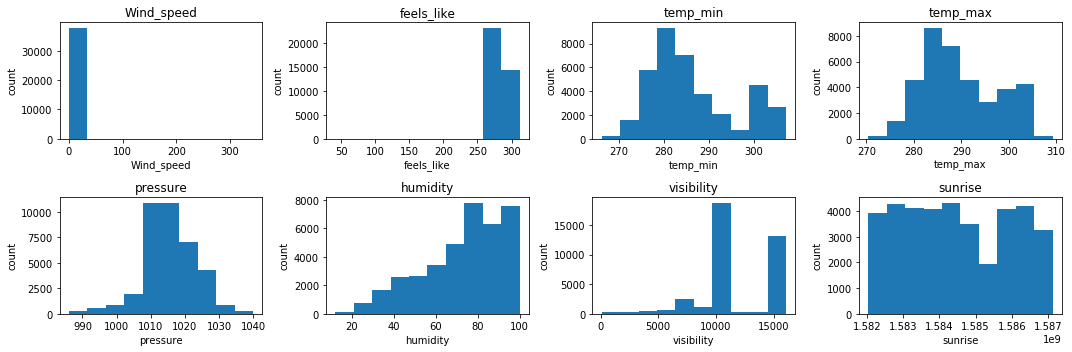

<Figure size 1440x720 with 0 Axes>

In [124]:
get_hist_for_all_variables()

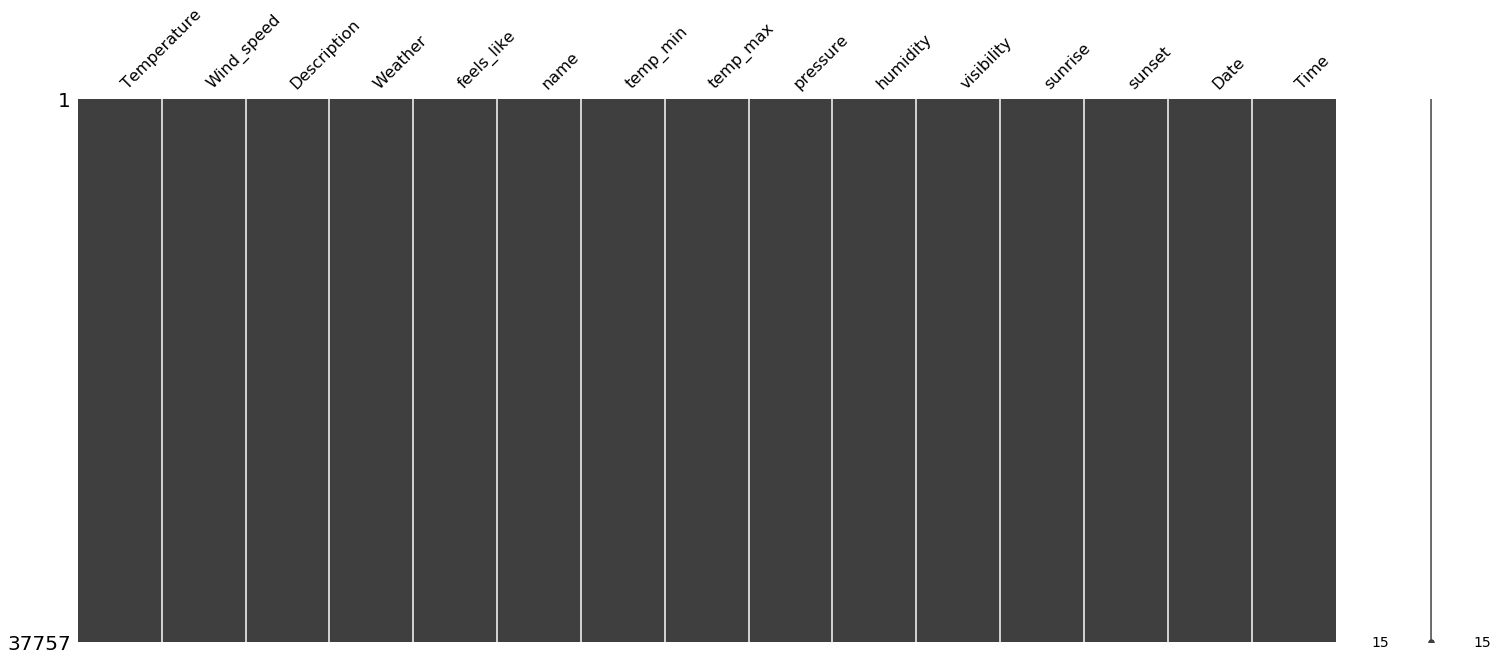

In [22]:
missingno.matrix(srcData)

In [23]:
srcData.isnull().sum()

Temperature    0
Wind_speed     0
Description    0
Weather        0
feels_like     0
name           0
temp_min       0
temp_max       0
pressure       0
humidity       0
visibility     0
sunrise        0
sunset         0
Date           0
Time           0
dtype: int64

Text(0.5, 1.0, 'Boxplot to detect outliers for Temperature')

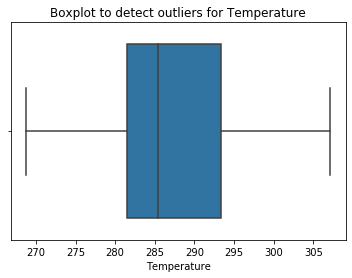

In [129]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
#scaler.fit_transform(srcData['visibility'].values.reshape(-1,1))
sns.boxplot(x=srcData['Temperature']).set_title("Boxplot to detect outliers for Temperature")

In [130]:
srcData.Temperature.min()

268.74

## Created two dataframes to hold continuous and discreate data seperately for future modelling purpose

In [131]:
df_bin = pd.DataFrame()
df_cont = pd.DataFrame()

In [132]:
srcData.dtypes

Temperature    float64
Wind_speed     float64
Description     object
Weather         object
feels_like     float64
name            object
temp_min       float64
temp_max       float64
pressure         int64
humidity         int64
visibility       int64
sunrise          int64
sunset           int64
Date            object
Time            object
dtype: object

## Let's explore each of these features individually
We'll go through each column iteratively and see which ones to use in our first models. Some may need more preprocessing than others to get ready.

In [133]:
srcData.head()

,Temperature,Wind_speed,Description,Weather,feels_like,name,temp_min,temp_max,pressure,humidity,visibility,sunrise,sunset,Date,Time
0,284.02,1.5,clear sky,Clear,281.11,Dublin,281.48,286.48,1016,50,16093,1582037662,1582076961,19/2/20,4:14:12
1,301.15,2.6,clear sky,Clear,307.02,France,301.15,301.15,1009,94,6000,1582093790,1582136891,19/2/20,4:14:12
2,278.39,7.2,few clouds,Clouds,271.81,Germany,277.15,279.82,1013,84,10000,1582093536,1582130311,19/2/20,4:14:12
3,284.19,6.7,overcast clouds,Clouds,278.01,Italy,283.15,285.37,1024,58,16093,1582031256,1582071339,19/2/20,4:14:13
4,284.69,4.1,broken clouds,Clouds,279.61,Tokyo,283.15,285.93,1024,40,10000,1582061102,1582100736,19/2/20,4:14:13


In [134]:
srcData.Description.value_counts()

clear sky                       8944
few clouds                      7302
broken clouds                   5792
overcast clouds                 4412
scattered clouds                4207
light rain                      3405
moderate rain                   1145
mist                             727
light intensity shower rain      364
shower rain                      300
thunderstorm                     271
heavy intensity rain             182
fog                              135
light snow                       122
light intensity drizzle          103
light intensity drizzle rain      75
haze                              58
thunderstorm with light rain      52
light shower snow                 33
thunderstorm with rain            32
drizzle                           27
thunderstorm with heavy rain      17
light rain and snow               15
snow                              10
drizzle rain                       9
heavy intensity shower rain        7
thunderstorm with drizzle          6
s

In [135]:
srcData.Weather.value_counts()

Clouds          21713
Clear            8944
Rain             5404
Mist              727
Thunderstorm      378
Drizzle           214
Snow              183
Fog               135
Haze               58
Smoke               1
Name: Weather, dtype: int64

In [136]:
srcData.head()

,Temperature,Wind_speed,Description,Weather,feels_like,name,temp_min,temp_max,pressure,humidity,visibility,sunrise,sunset,Date,Time
0,284.02,1.5,clear sky,Clear,281.11,Dublin,281.48,286.48,1016,50,16093,1582037662,1582076961,19/2/20,4:14:12
1,301.15,2.6,clear sky,Clear,307.02,France,301.15,301.15,1009,94,6000,1582093790,1582136891,19/2/20,4:14:12
2,278.39,7.2,few clouds,Clouds,271.81,Germany,277.15,279.82,1013,84,10000,1582093536,1582130311,19/2/20,4:14:12
3,284.19,6.7,overcast clouds,Clouds,278.01,Italy,283.15,285.37,1024,58,16093,1582031256,1582071339,19/2/20,4:14:13
4,284.69,4.1,broken clouds,Clouds,279.61,Tokyo,283.15,285.93,1024,40,10000,1582061102,1582100736,19/2/20,4:14:13


In [137]:
df_cont['Temperature'] = srcData['Temperature']
df_bin['Temperature'] = srcData['Temperature']

In [138]:
df_bin.head()

,Temperature
0,284.02
1,301.15
2,278.39
3,284.19
4,284.69


,Temperature,Wind_speed,feels_like,temp_min,temp_max,pressure,humidity,visibility,sunrise,sunset
Temperature,1.000000,0.124459,0.776689,0.975460,0.981339,0.096268,-0.753474,0.162351,-0.053761,-0.053763
Wind_speed,0.124459,1.000000,-0.513981,0.125173,0.121862,-0.085708,-0.148000,0.012277,-0.039807,-0.039807
feels_like,0.776689,-0.513981,1.000000,0.761562,0.758125,0.120114,-0.468113,0.102646,0.029462,0.029460
temp_min,0.975460,0.125173,0.761562,1.000000,0.921390,0.091164,-0.702274,0.140093,-0.023828,-0.023831
temp_max,0.981339,0.121862,0.758125,0.921390,1.000000,0.105515,-0.765857,0.173646,-0.083186,-0.083189
pressure,0.096268,-0.085708,0.120114,0.091164,0.105515,1.000000,-0.151781,0.154390,-0.245946,-0.245945
humidity,-0.753474,-0.148000,-0.468113,-0.702274,-0.765857,-0.151781,1.000000,-0.296307,0.300333,0.300334
visibility,0.162351,0.012277,0.102646,0.140093,0.173646,0.154390,-0.296307,1.000000,-0.082831,-0.082831
sunrise,-0.053761,-0.039807,0.029462,-0.023828,-0.083186,-0.245946,0.300333,-0.082831,1.000000,1.000000
sunset,-0.053763,-0.039807,0.029460,-0.023831,-0.083189,-0.245945,0.300334,-0.082831,1.000000,1.000000


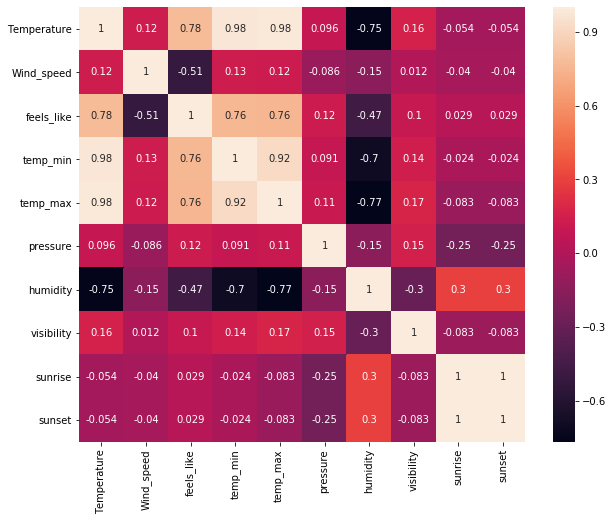

In [139]:
# Finding the relations between the variables.
plt.figure(figsize=(10,8))
c= srcData[srcData['name']=='Dublin'].corr()
sns.heatmap(c,annot=True)
c

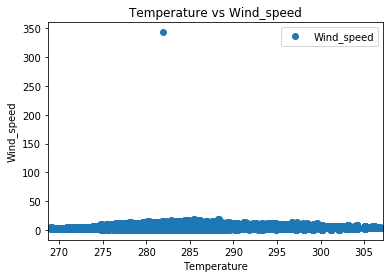

In [140]:
srcData.plot(x='Temperature', y='Wind_speed', style='o')  
plt.title('Temperature vs Wind_speed')  
plt.xlabel('Temperature')  
plt.ylabel('Wind_speed')  
plt.show()

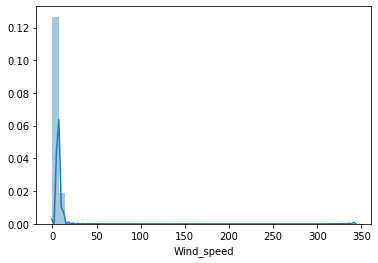

In [141]:
sns.distplot(srcData.Wind_speed)

In [142]:
df_cont['Wind_speed']=srcData['Wind_speed']
df_bin['Wind_speed'] = srcData['Wind_speed']

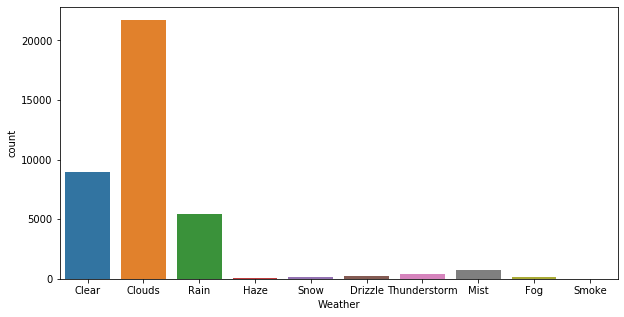

In [143]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x='Weather',data=srcData)

In [144]:
df_cont['Weather'] = srcData['Weather'] 
df_cont.head()

,Temperature,Wind_speed,Weather
0,284.02,1.5,Clear
1,301.15,2.6,Clear
2,278.39,7.2,Clouds
3,284.19,6.7,Clouds
4,284.69,4.1,Clouds


## We need to encode the variable(weather) now before inserting into bin dataframe 

In [145]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [146]:
df_bin.head()

,Temperature,Wind_speed
0,284.02,1.5
1,301.15,2.6
2,278.39,7.2
3,284.19,6.7
4,284.69,4.1


## Doing label encoding to change the string to integers

If that integer has some weightage like High,Low,Medium then we can stop with that itself.

However if it is not having such weightage, Then we have to do one hot coding further more to create dummy variables

This can also be done using pandas get_dummies() method

In [147]:
le = LabelEncoder()
columns = list(le.fit(df_cont['Weather']).classes_)
columns

['Clear',
 'Clouds',
 'Drizzle',
 'Fog',
 'Haze',
 'Mist',
 'Rain',
 'Smoke',
 'Snow',
 'Thunderstorm']

In [148]:
df_bin['Weather'] = srcData['Weather']
df_bin['Weather_Enc'] = le.fit_transform(df_bin['Weather'].astype(str))

In [149]:
df_bin.head()

,Temperature,Wind_speed,Weather,Weather_Enc
0,284.02,1.5,Clear,0
1,301.15,2.6,Clear,0
2,278.39,7.2,Clouds,1
3,284.19,6.7,Clouds,1
4,284.69,4.1,Clouds,1


In [150]:
oe = OneHotEncoder()
#X = oe.fit([df_bin['Weather_Enc']])
enc_arr = pd.DataFrame()
#df_bin = oe.fit_transform([df_bin['Weather_Enc']])
#enc_arr.head()
enc_arr['Weather'] = srcData['Weather']
enc_arr.head()

,Weather
0,Clear
1,Clear
2,Clouds
3,Clouds
4,Clouds


In [151]:
tmp_df = pd.DataFrame()
tmp_df['Weather'] = srcData['Weather']
tmp_df['Weather_cat'] = le.fit_transform(df_bin['Weather'].astype(str))
tmp_df.head()

,Weather,Weather_cat
0,Clear,0
1,Clear,0
2,Clouds,1
3,Clouds,1
4,Clouds,1


In [152]:
enc_df = pd.DataFrame(oe.fit_transform(tmp_df[['Weather_cat']]).toarray().astype(int))
enc_df.columns = columns
enc_df.head()

,Clear,Clouds,Drizzle,Fog,Haze,Mist,Rain,Smoke,Snow,Thunderstorm
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0


In [153]:
# Using Pandas method
dum_df = pd.get_dummies(enc_arr,columns=['Weather'],drop_first=True)
dum_df.head()

,Weather_Clouds,Weather_Drizzle,Weather_Fog,Weather_Haze,Weather_Mist,Weather_Rain,Weather_Smoke,Weather_Snow,Weather_Thunderstorm
0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0


## Need to append it with the original discretized bin 

In [154]:
df_bin.head()

,Temperature,Wind_speed,Weather,Weather_Enc
0,284.02,1.5,Clear,0
1,301.15,2.6,Clear,0
2,278.39,7.2,Clouds,1
3,284.19,6.7,Clouds,1
4,284.69,4.1,Clouds,1


In [155]:
df_bin = pd.concat([df_bin,enc_df],axis=1)

In [156]:
df_bin.head()

,Temperature,Wind_speed,Weather,Weather_Enc,Clear,Clouds,Drizzle,Fog,Haze,Mist,Rain,Smoke,Snow,Thunderstorm
0,284.02,1.5,Clear,0,1,0,0,0,0,0,0,0,0,0
1,301.15,2.6,Clear,0,1,0,0,0,0,0,0,0,0,0
2,278.39,7.2,Clouds,1,0,1,0,0,0,0,0,0,0,0
3,284.19,6.7,Clouds,1,0,1,0,0,0,0,0,0,0,0
4,284.69,4.1,Clouds,1,0,1,0,0,0,0,0,0,0,0


In [157]:
df_bin = df_bin.drop(['Weather','Weather_Enc'], axis=1)

In [158]:
df_bin.head()

,Temperature,Wind_speed,Clear,Clouds,Drizzle,Fog,Haze,Mist,Rain,Smoke,Snow,Thunderstorm
0,284.02,1.5,1,0,0,0,0,0,0,0,0,0
1,301.15,2.6,1,0,0,0,0,0,0,0,0,0
2,278.39,7.2,0,1,0,0,0,0,0,0,0,0
3,284.19,6.7,0,1,0,0,0,0,0,0,0,0
4,284.69,4.1,0,1,0,0,0,0,0,0,0,0


In [159]:
df_cont.head()

,Temperature,Wind_speed,Weather
0,284.02,1.5,Clear
1,301.15,2.6,Clear
2,278.39,7.2,Clouds
3,284.19,6.7,Clouds
4,284.69,4.1,Clouds


In [160]:
srcData.head()

,Temperature,Wind_speed,Description,Weather,feels_like,name,temp_min,temp_max,pressure,humidity,visibility,sunrise,sunset,Date,Time
0,284.02,1.5,clear sky,Clear,281.11,Dublin,281.48,286.48,1016,50,16093,1582037662,1582076961,19/2/20,4:14:12
1,301.15,2.6,clear sky,Clear,307.02,France,301.15,301.15,1009,94,6000,1582093790,1582136891,19/2/20,4:14:12
2,278.39,7.2,few clouds,Clouds,271.81,Germany,277.15,279.82,1013,84,10000,1582093536,1582130311,19/2/20,4:14:12
3,284.19,6.7,overcast clouds,Clouds,278.01,Italy,283.15,285.37,1024,58,16093,1582031256,1582071339,19/2/20,4:14:13
4,284.69,4.1,broken clouds,Clouds,279.61,Tokyo,283.15,285.93,1024,40,10000,1582061102,1582100736,19/2/20,4:14:13


In [161]:
df_bin['temp_min'] = srcData['temp_min']
df_cont['temp_min'] = srcData['temp_min']
df_bin['temp_max'] = srcData['temp_max']
df_cont['temp_max'] = srcData['temp_max']
df_bin['pressure'] = srcData['pressure']
df_cont['pressure'] = srcData['pressure']
df_bin['humidity'] = srcData['humidity']
df_cont['humidity'] = srcData['humidity']

In [162]:
df_cont.head()

,Temperature,Wind_speed,Weather,temp_min,temp_max,pressure,humidity
0,284.02,1.5,Clear,281.48,286.48,1016,50
1,301.15,2.6,Clear,301.15,301.15,1009,94
2,278.39,7.2,Clouds,277.15,279.82,1013,84
3,284.19,6.7,Clouds,283.15,285.37,1024,58
4,284.69,4.1,Clouds,283.15,285.93,1024,40


In [163]:
df_bin.head()

,Temperature,Wind_speed,Clear,Clouds,Drizzle,Fog,Haze,Mist,Rain,Smoke,Snow,Thunderstorm,temp_min,temp_max,pressure,humidity
0,284.02,1.5,1,0,0,0,0,0,0,0,0,0,281.48,286.48,1016,50
1,301.15,2.6,1,0,0,0,0,0,0,0,0,0,301.15,301.15,1009,94
2,278.39,7.2,0,1,0,0,0,0,0,0,0,0,277.15,279.82,1013,84
3,284.19,6.7,0,1,0,0,0,0,0,0,0,0,283.15,285.37,1024,58
4,284.69,4.1,0,1,0,0,0,0,0,0,0,0,283.15,285.93,1024,40


In [166]:
df_bin['sunrise'] = srcData['sunrise']
df_cont['sunrise'] = srcData['sunrise']
df_bin['sunset'] = srcData['sunset']
df_cont['sunset'] = srcData['sunset']
df_bin['visibility'] = srcData['visibility']
df_cont['visibility'] = srcData['visibility']
df_bin.head()

,Temperature,Wind_speed,Clear,Clouds,Drizzle,Fog,Haze,Mist,Rain,Smoke,Snow,Thunderstorm,temp_min,temp_max,pressure,humidity,sunrise,sunset,visibility
0,284.02,1.5,1,0,0,0,0,0,0,0,0,0,281.48,286.48,1016,50,1582037662,1582076961,16093
1,301.15,2.6,1,0,0,0,0,0,0,0,0,0,301.15,301.15,1009,94,1582093790,1582136891,6000
2,278.39,7.2,0,1,0,0,0,0,0,0,0,0,277.15,279.82,1013,84,1582093536,1582130311,10000
3,284.19,6.7,0,1,0,0,0,0,0,0,0,0,283.15,285.37,1024,58,1582031256,1582071339,16093
4,284.69,4.1,0,1,0,0,0,0,0,0,0,0,283.15,285.93,1024,40,1582061102,1582100736,10000


## Our Data processing work is completed and we can proceed with the model selection

In [234]:
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import utils
from sklearn.model_selection import train_test_split 
import numpy as np
from sklearn import svm
import seaborn as sns
from sklearn.model_selection import cross_val_score, KFold
from sklearn import metrics

In [209]:
selected_df = df_bin

In [210]:
y = selected_df.iloc[:,[0]]
y

,Temperature
0,284.02
1,301.15
2,278.39
3,284.19
4,284.69
...,...
37752,302.15
37753,288.01
37754,302.15
37755,288.01


In [211]:
len(selected_df.columns)
X = selected_df.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]]
X.head()

,Wind_speed,Clear,Clouds,Drizzle,Fog,Haze,Mist,Rain,Smoke,Snow,Thunderstorm,temp_min,temp_max,pressure,humidity,sunrise,sunset
0,1.5,1,0,0,0,0,0,0,0,0,0,281.48,286.48,1016,50,1582037662,1582076961
1,2.6,1,0,0,0,0,0,0,0,0,0,301.15,301.15,1009,94,1582093790,1582136891
2,7.2,0,1,0,0,0,0,0,0,0,0,277.15,279.82,1013,84,1582093536,1582130311
3,6.7,0,1,0,0,0,0,0,0,0,0,283.15,285.37,1024,58,1582031256,1582071339
4,4.1,0,1,0,0,0,0,0,0,0,0,283.15,285.93,1024,40,1582061102,1582100736


In [212]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [213]:
len(y_test)
y_test.dtypes

Temperature    float64
dtype: object

In [214]:
display(X_train.shape,X_test.shape)

(30205, 17)

(7552, 17)

## Class to handle all ML repetitive Operations

In [235]:
class ML_class():
    # Method to train and return the fitted model
    def train_model(self,algorithm,X_train,y_train):
        fitted_model = algorithm.fit(X_train, y_train)
        return fitted_model
    
    # Method to predict and cross validate the output
    def predict_evaluate(self,fitted_model,X_test,y_test,cv):
        y_pred = fitted_model.predict(X_test)
        MAE = round(metrics.mean_absolute_error(y_test, y_pred)*100,2)
        RMSE = round(np.sqrt(metrics.mean_squared_error(y_test, y_pred))*10,2)
        Accuracy = round(fitted_model.score(X_test,y_test)*100,2)
        
        # cross validation
        CV_Score = round(np.mean(cross_val_score(fitted_model, X_test, y_test, cv=KFold(n_splits=cv)))*100,2)
        
        return y_pred,MAE,RMSE,Accuracy,CV_Score
    
    # To check optimised max_depth
    def get_max_depth(self,max_depth_arr):
        MAE_arr = []
        for i in max_depth_arr:
            dtr = DecisionTreeRegressor(random_state=1,max_depth=i)
            dtr.fit(X_train,y_train)
            y_pred = dtr.predict(X_test)
            MAE_arr.append(round(metrics.mean_absolute_error(y_test, y_pred)*100,2))
        return MAE_arr
        

In [236]:
# Instanciating an Object for ML class
ML_class_obj = ML_class()
regressor = ML_class_obj.train_model(LinearRegression(),X_train,y_train)

In [237]:
coeff_df = pd.DataFrame(regressor.coef_.reshape(-1,1), X.columns, columns=['Coefficient'])  
coeff_df.sort_values('Coefficient',inplace=True,ascending=False)
coeff_df.style.background_gradient(cmap=sns.light_palette("Yellow", as_cmap=True))

,Coefficient
Smoke,0.746654
temp_max,0.499662
temp_min,0.497225
sunset,7.3517e-06
sunrise,-7.35595e-06
Wind_speed,-0.00109631
humidity,-0.00241303
pressure,-0.00309503
Clear,-0.0341861
Clouds,-0.038827


In [238]:
# Calling prediction method to predict and evaluate the performance of the model
y_pred,MAE_lm,RMSE_lm,Accuracy_lm,CV_lm = ML_class_obj.predict_evaluate(regressor,X_test,y_test,10)

In [239]:
my_dict = {'Actual': y_test.values.reshape(-1), 'Predicted': y_pred.reshape(-1)}
df = pd.DataFrame(my_dict)
df.head()

,Actual,Predicted
0,283.90,283.075597
1,301.15,301.111231
2,289.51,289.652616
3,282.64,282.520087
4,300.15,300.115422


In [240]:
print('Mean Absolute Error:', MAE_lm)
print('Root Mean Squared Error:', RMSE_lm)
print('Accuracy : ', Accuracy_lm)
print('Cross validation score : ',CV_lm)

Mean Absolute Error: 17.31
Root Mean Squared Error: 2.85
Accuracy :  99.89
Cross validation score :  99.89


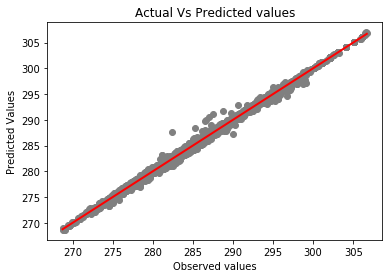

In [241]:
plt.scatter(y_test,y_pred,  color='gray')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()] ,color='red', linewidth=2)
plt.title('Actual Vs Predicted values')
plt.xlabel('Observed values')
plt.ylabel('Predicted Values')
plt.show()

## Decision Tree Regressor

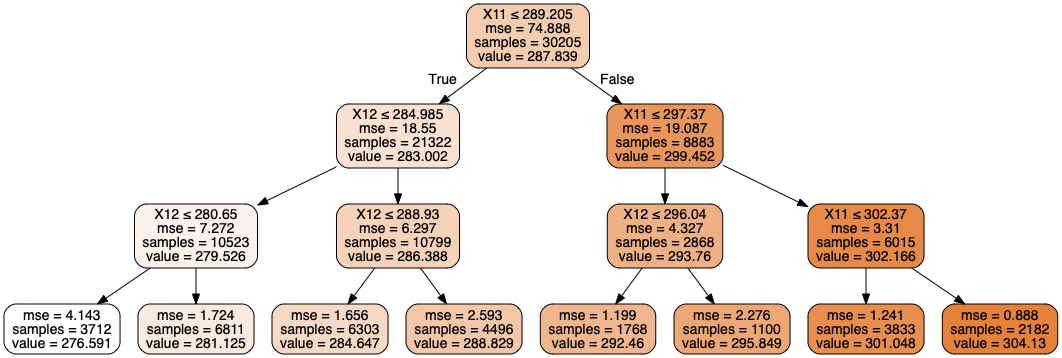

In [242]:
dtr = DecisionTreeRegressor(random_state=1,max_depth=3)
dtr.fit(X_train,y_train)
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtr, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [243]:
max_depth_arr = [3,4,5,6,7,8,10,12,14,16,20,22,25,27,28,30,35,40]
MAE_arr = ML_class_obj.get_max_depth(max_depth_arr)

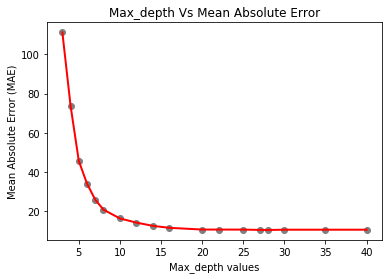

In [244]:
plt.scatter(max_depth_arr,MAE_arr,  color='gray')
plt.plot(max_depth_arr,MAE_arr,color='red', linewidth=2)
plt.title('Max_depth Vs Mean Absolute Error')
plt.xlabel('Max_depth values')
plt.ylabel('Mean Absolute Error (MAE)')
plt.show()

In [245]:
# Fitting a decision tree model with max_depth as 20
dtr = ML_class_obj.train_model(DecisionTreeRegressor(random_state=1,max_depth=20),X_train,y_train)

In [246]:
y_pred,MAE_dtr,RMSE_dtr,Accuracy_dtr,CV_dtr = ML_class_obj.predict_evaluate(dtr,X_test,y_test,10)

In [247]:
print('Mean Absolute Error:', MAE_dtr)
print('Root Mean Squared Error:', RMSE_dtr)
print('Accuracy : ', Accuracy_dtr)
print('Cross validation score : ',CV_dtr)

Mean Absolute Error: 10.7
Root Mean Squared Error: 2.43
Accuracy :  99.92
Cross validation score :  99.84


In [248]:
final_res_df = pd.DataFrame({'ML Models' : ['Multiple Linear Regression','Decision Tree Regressor'],
              'Accuracy in %' : [Accuracy_lm,Accuracy_dtr],
             'MAE':[MAE_lm,MAE_dtr],
             'RMSE':[RMSE_lm,RMSE_dtr],
             'CV Score in %':[CV_lm,CV_dtr]})

In [249]:
cm = sns.light_palette("violet", as_cmap=True)
res_df = final_res_df.style.background_gradient(cmap=cm)
res_df

,ML Models,Accuracy in %,MAE,RMSE,CV Score in %
0,Multiple Linear Regression,99.89,17.31,2.85,99.89
1,Decision Tree Regressor,99.92,10.7,2.43,99.84
